# Geometric Distribution - Snowboarding

> This document is written in *R*.
>
> ***GitHub***: https://github.com/czs108

## Definition

\begin{equation}
P(X = r) = (1 - p)^{r - 1} \cdot p
\end{equation}

\begin{align}
X &= \text{The number of trials needed to get the first successful outcome.} \\
p &= \text{The probability of a success on an individual trial.}
\end{align}

If a variable $X$ follows a *Geometric Distribution* where the probability of *success* in a trial is $p$, this can be written as

\begin{equation}
X \sim Geo(p)
\end{equation}

For inequalities:

\begin{equation}
P(X > r) = (1 - p)^{r}
\end{equation}

In order for more than $r$ trials to be needed, this means that the first $r$ trials must have ended in *failure*. 

\begin{equation}
P(X \leq r) = 1 - (1 - p)^{r}
\end{equation}

### Expectation

\begin{equation}
E(X) = \frac{1}{p}
\end{equation}

### Variance

\begin{equation}
Var(X) = \frac{(1 - p)}{p^{2}}
\end{equation}

## Background

> The probability $p$ of a snowboarder making a successful run down the slope is **0.4**, and he's going to keep on trying until he succeeds, assuming trials are independent.

In [4]:
p <- 0.4
count <- c(1:20)

probs <- ((1 - p) ^ (count - 1)) * p
probs

[1] 4.000000e-01 2.400000e-01 1.440000e-01 8.640000e-02 5.184000e-02
 [6] 3.110400e-02 1.866240e-02 1.119744e-02 6.718464e-03 4.031078e-03
[11] 2.418647e-03 1.451188e-03 8.707129e-04 5.224278e-04 3.134567e-04
[16] 1.880740e-04 1.128444e-04 6.770664e-05 4.062398e-05 2.437439e-05

Use the `dgeom` function directly where the `x` is the number of *failures* prior to the first success.

In [5]:
dgeom(x=c(0:5), prob=p)

[1] 0.400000 0.240000 0.144000 0.086400 0.051840 0.031104

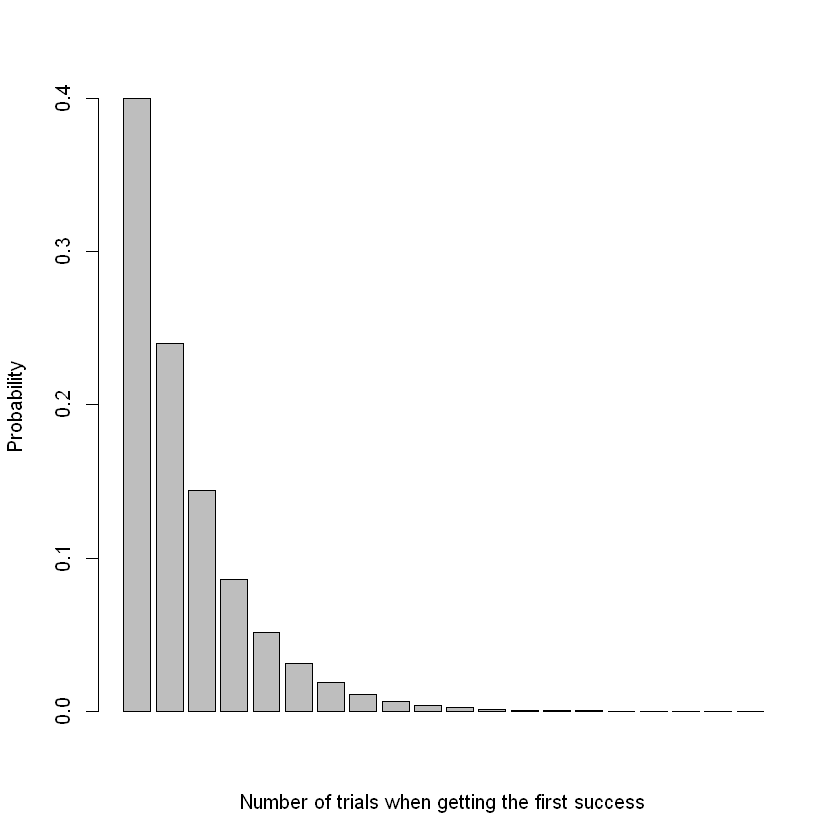

In [6]:
barplot(probs, xlab="Number of trials when getting the first success", ylab="Probability")

## Question A

> What's the probability that he will be successful on his *2nd* attempt, while failing on his *1st*?

\begin{equation}
\begin{split}
P(X = 2) &= (1 - p) \cdot p \\
    &= 0.6 \times 0.4 \\
    &= 0.24
\end{split}
\end{equation}

In [7]:
dgeom(x=1, prob=p)

[1] 0.24

## Question B

> What's the probability that he will be successful in **4** attempts or *fewer*?

\begin{equation}
\begin{split}
P(X \leq 4) &= 1 - P(X > 4) \\
    &= 1 - (1 - p)^{4} \\
    &= 1 - 0.6^{4} \\
    &= 0.8704
\end{split}
\end{equation}

In [8]:
sum(dgeom(x=c(0:3), prob=p))

[1] 0.8704

Or use the `pgeom` function.

In [9]:
pgeom(q=3, prob=p)

[1] 0.8704

## Question C

> What's the probability that he will need *more* than **4** attempts to be successful?

\begin{equation}
\begin{split}
P(X > 4) &= (1 - p)^{4} \\
    &= 0.6^{4} \\
    &= 0.1296
\end{split}
\end{equation}

## Question D

> What's the number of attempts he *expects* he'll need to make before being successful?

\begin{equation}
\begin{split}
E(X) &= \frac{1}{p} \\
    &= \frac{1}{0.4} \\
    &= 2.5
\end{split}
\end{equation}

In [7]:
mean <- sum(count * probs)
mean

[1] 2.499177

## Question E

> What's the *variance* of the number of attempts?

\begin{equation}
\begin{split}
Var(X) &= \frac{(1 - p)}{p^2} \\
    &= \frac{0.6}{0.4^2} \\
    &= 3.75
\end{split}
\end{equation}

In [8]:
var <- sum(((count - mean) ^ 2) * probs)
var

[1] 3.735238